In [2]:
import pandas as pd
import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
import random
import string
%matplotlib inline

# from week 13 in YY's Data Vis Class
# import spacy
# import wordcloud
# import en_core_web_sm
# # nlp = spacy.load('en')
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [3]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh


full_filename = "../data/by_article_fulltext_020920.jl"



print("done")

done


In [19]:
# get full text dataset as a df
full_df = imp.init_df(full_filename, "full")

full_df.head(3)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,n_posts_author,column1,column2,one_time
0,5839,how to write a winning résumé,"[tooling up, advice, graduate, academic, industry, americas, united states]",peter fiske,1996-10-18,8:00 am,"by welcome to ""tooling up,"" a monthly column about job hunting and career development for sci...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",18,10,1996,59,no,yes,no
1,5835,the commandments of cover letter creation,"[tooling up, advice, americas]",peter fiske,1996-12-20,0:00 am,"by 've always hated the term ""cover letter."" it implies that the letter you send out to acco...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",81,12,1996,59,no,yes,no
2,5840,dressing scientists for success: male case study,"[tooling up, advice, graduate, postdoc, academic, industry, americas]",peter fiske,1997-09-26,8:00 am,"by e all know that, with respect to fashion, the world holds a rather dim view of scientists...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",361,21,1997,59,no,yes,no


In [20]:
full_df = cls.clean_text_df(full_df)
person_automated = cls.designate_person_from_df(full_df)

full_df["person_automated"] = person_automated

processed1
lemmatized


In [22]:
full_df["person_automated"].value_counts()

third     3293
first     1631
second    1200
Name: person_automated, dtype: int64

In [ ]:
# original:

# third: 3851
# second: 1239
# first: 1034

In [7]:
# counts_df = pronouns(full_dict)

# counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
# counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

In [23]:
full_vis = vis.prep_per(full_df, group_by = "year")
full_vis = full_vis[full_vis["year"]<2020]

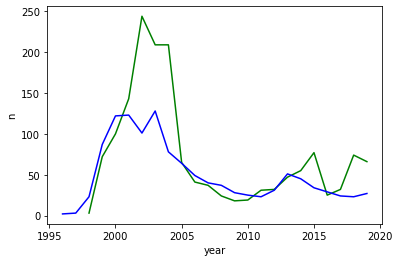

In [33]:
# based on classifier model

first_df = full_df[full_df.person_automated == "first"]
second_df = full_df[full_df.person_automated == "second"]

first_vis = vis.prep_per(first_df, group_by="year")
first_vis = first_vis[first_vis["year"]<2020]
second_vis = vis.prep_per(second_df, group_by="year")
second_vis = second_vis[second_vis["year"]<2020]
full_vis = vis.prep_per(full_df, group_by = "year")
full_vis = full_vis[full_vis["year"]<2020]

sns.lineplot(x = "year", y = "n", color = "green", data=first_vis)
sns.lineplot(x = "year", y = "n", color = "blue", data=second_vis)
# sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)

# plt.savefig("../figs/by_classifier_over_time.png")

In [29]:
first_vis.head(2)

,year,id,date_seq,month_seq,n_posts_author,n,frac
0,1998,17587,2315,104,307,3,1.5
1,1999,431127,71728,3047,1543,72,24.0


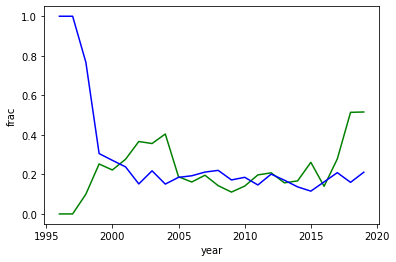

In [34]:
new_row = pd.DataFrame({"year":[1996,1997], "id":["NA", "NA"], "date_seq":["NA","NA"],"month_seq":["NA","NA"],"n_posts_author":["NA","NA"],"n":[.0,.0]})
first_vis = pd.concat([new_row, first_vis]).reset_index(drop = True) 

first_vis["frac"] = first_vis["n"]/full_vis["n"]
second_vis["frac"] = second_vis["n"]/full_vis["n"]

sns.lineplot(x = "year", y = "frac", color = "green", data=first_vis)
sns.lineplot(x = "year", y = "frac", color = "blue", data=second_vis)

In [12]:
full_advice = "../data/genre_advice_full_021520.jl"

# get full text dataset as a df
advice_df = imp.init_df(full_advice, "full", advice=True)
# advice_df = advice_df[advice_df["year"]<2020]

print("done")

done


In [13]:
advice_df.head(3)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,n_posts_author,column1,column2
0,2173,the tooling up book club: on the market,"[tooling up, advice, graduate, postdoc, academic, americas]",peter fiske,1998-01-30,0:00 am,"by ow that the holiday season is over, you have returned to your regular life, in the lab, i...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",30,1,1998,56,no,yes
1,2206,self-assessment exercises: a gre for your ego and superego,"[tooling up, advice, early career, graduate, midcareer, postdoc, undergraduate, academic, govern...",peter fiske,1998-02-27,0:00 am,by --miguel de cervantes any young scientists who explore nontraditional careers are seeking...,"[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",58,2,1998,56,no,yes
2,2207,it's april and i still don't have a job! the panicked scientist's guide to accelerated job searches,"[tooling up, advice, early career, graduate, undergraduate, academic, government, industry, amer...",peter fiske,1998-03-27,0:00 am,by t's 3 a.m. you've been at the bench for 18 hours finishing up your final set of thesis or...,"[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",86,3,1998,56,no,yes


In [25]:
advice_df = cls.clean_text_df(advice_df)
person_automated = cls.designate_person_from_df(advice_df)
advice_df["person_automated"] = person_automated
advice_df["person_automated"].value_counts()

processed1


KeyboardInterrupt: 

In [ ]:
# original

# third     1291
# second     817
# first      256

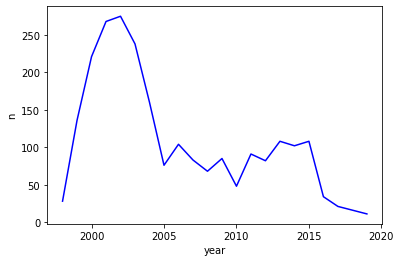

In [7]:
advice_df = advice_df[advice_df["year"]<2020]

advice_vis = vis.prep_per(advice_df, group_by="year")

sns.lineplot(x = "year", y = "n", color = "blue", data=advice_vis)
sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)


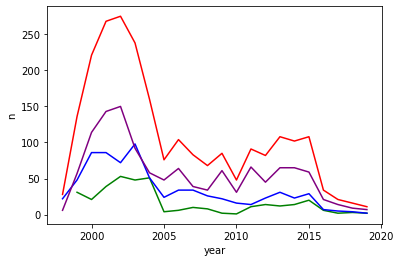

In [25]:
a_first_df = advice_df[advice_df.person_automated == "first"]
a_second_df = advice_df[advice_df.person_automated == "second"]
a_third_df = advice_df[advice_df.person_automated == "third"]

first_vis = vis.prep_per(a_first_df, group_by="year")
# first_vis = first_vis[a_first_vis["year"]<2020]
second_vis = vis.prep_per(a_second_df, group_by="year")
# second_vis = second_vis[second_vis["year"]<2020]
third_vis = vis.prep_per(a_third_df, group_by="year")
# third_vis = third_vis[third_vis["year"]<2020]
advice_vis = vis.prep_per(advice_df, group_by = "year")
# advice_vis = full_vis[advice_vis["year"]<2020]

sns.lineplot(x = "year", y = "n", color = "green", data=first_vis)
sns.lineplot(x = "year", y = "n", color = "blue", data=second_vis)
sns.lineplot(x = "year", y = "n", color = "purple", data=third_vis)

sns.lineplot(x = "year", y = "n", color = "red", data=advice_vis)

In [15]:
full_WL = "../data/genre_WL_full_021520.jl"

# get full text dataset as a df
WL_df = imp.init_df(full_WL, "full", genre="WL")
# advice_df = advice_df[advice_df["year"]<2020]

print("done")

done


In [16]:
# column and not

column = full_df[full_df.column2 == "yes"]
not_column = full_df[full_df.column2 == "no"]

print(len(column))
print(len(not_column))

4331
1793


In [22]:
column_count = pd.DataFrame(column["person_automated"].value_counts())
column_count["frac"] = column_count/len(column)
column_count.head()

,person_automated,frac
third,2887,0.666590
second,890,0.205495
first,554,0.127915


In [24]:
not_column_count = pd.DataFrame(not_column["person_automated"].value_counts())
not_column_count["frac"] = not_column_count/len(not_column)
not_column_count.head()

,person_automated,frac
third,887,0.494702
first,712,0.397100
second,194,0.108199


In [29]:
full_df["advice"] = ["yes" if "advice" in x else "no" for x in full_df["tags"]]
advice_df = full_df[full_df.advice == "yes"]
not_advice_df = full_df[full_df.advice == "no"]
print(len(advice_df))

advice_count = pd.DataFrame(advice_df["person_automated"].value_counts())
advice_count["frac"] = advice_count/len(advice_df)
advice_count.head()
# advice_df["person_automated"].value_counts()

2308


,person_automated,frac
third,1222,0.529463
second,736,0.318891
first,350,0.151646


In [28]:
print(len(not_advice_df))

not_advice_count = pd.DataFrame(not_advice_df["person_automated"].value_counts())
not_advice_count["frac"] = not_advice_count/len(not_advice_df)
not_advice_count.head()

3816


,person_automated,frac
third,2552,0.668763
first,916,0.240042
second,348,0.091195
